# Team 44 Group Assignment: Stroke Prediction

A stroke can be defined as an interruption of blood flow to part of the brain that can cause critical damage to brain tissue. This will result in permanent loss of brain function within minutes if blood flow is not reestablished immediately such as a loss of motor functions and rational thought. According to the Centres for Disease Control and Prevention (CDC), 1 in 6 deaths from cardiovascular diseases was from strokes in the year 2020 in the United States.

Hence, it is imperative that steps be taken to identify individuals who are at risk of getting a stroke to prevent permanent physiological damage to individuals of society.

In this machine learning project, we, Team 44 of the WIA1006 Machine Learning course of University of Malaya would like to develop a machine learning model that predicts which individual(s) are at risk of getting a stroke. We will analyze a dataset of interest that will be used to train different machine learning models of which we will evaluate their respective accuracies and efficiencies.

## Data Analysis

In [ ]:
# Importing popular data science libraries
import pandas as pd # for data manipulation and analysis
import numpy as np #  for working with arrays - has functions working with linear algebra, fourier transform and matrices
import matplotlib.pyplot as plt # creating static, animated and interactive visualizations in Python
import seaborn as sns # provides high-level interface for drawing attractive and informative statistical graphics

### Loading dataset

This section involves previewing, studying the features and checking the dataset for missing values

In [ ]:
url = 'https://raw.githubusercontent.com/Kairos5106/MLTeam44/master/stroke-dataset-ruthvik.csv?token=GHSAT0AAAAAACCAQYHMVMMPVYH5EG4OLWXUZCM3MSA'
data = pd.read_csv(url)

In [ ]:
data # prints the first and last few rows of training example

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


There is a column 'id' which is irrelevant because the unique identifiers are not meaningful. That column will be discarded from the dataframe.

In [ ]:
data.drop(columns="id", inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


From the data.info() command, we can see that the feature 'bmi' has missing values relative to all the other features. The missing values will need to be handled in the data preprocessing section later.

In [ ]:
data.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,0.656164,0.508023,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,0.475034,0.499985,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,1.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Based on the output above, there are some observations that can be made:
1. BMI contains missing values. (BMI count is 4909 when data frame consists of 5110 rows)
2. The mean age is 43.
3. The mean glucose level is 106.
4. The mean bmi is 28.

<Axes: >

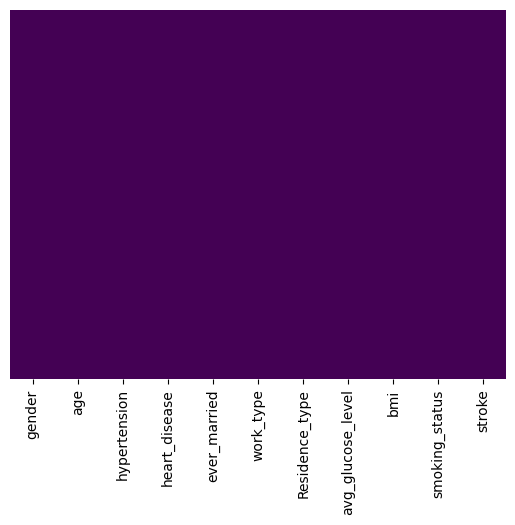

In [ ]:
# Use seaborn to create a simple heatmap to see where we are missing data
sns.heatmap(data.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [ ]:
print(data.ever_married.value_counts())
print(data.work_type.value_counts())
print(data.Residence_type.value_counts())
print(data.smoking_status.value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


We can see that there are some non-numeric features or categorical variables available in the dataset. These will be processed to become numeric, binary features later on in the data preprocessing section

### Data visualization

Creating graphical representations of the numeric features to perceive the dataset from a different angle

Visualising data through graphical representation can provide a comprehensive understanding of the interplay between individual features and the target variable. This approach facilitates a more effective assessment of the relationship between the variables in question, allowing for a deeper and more nuanced analysis.


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

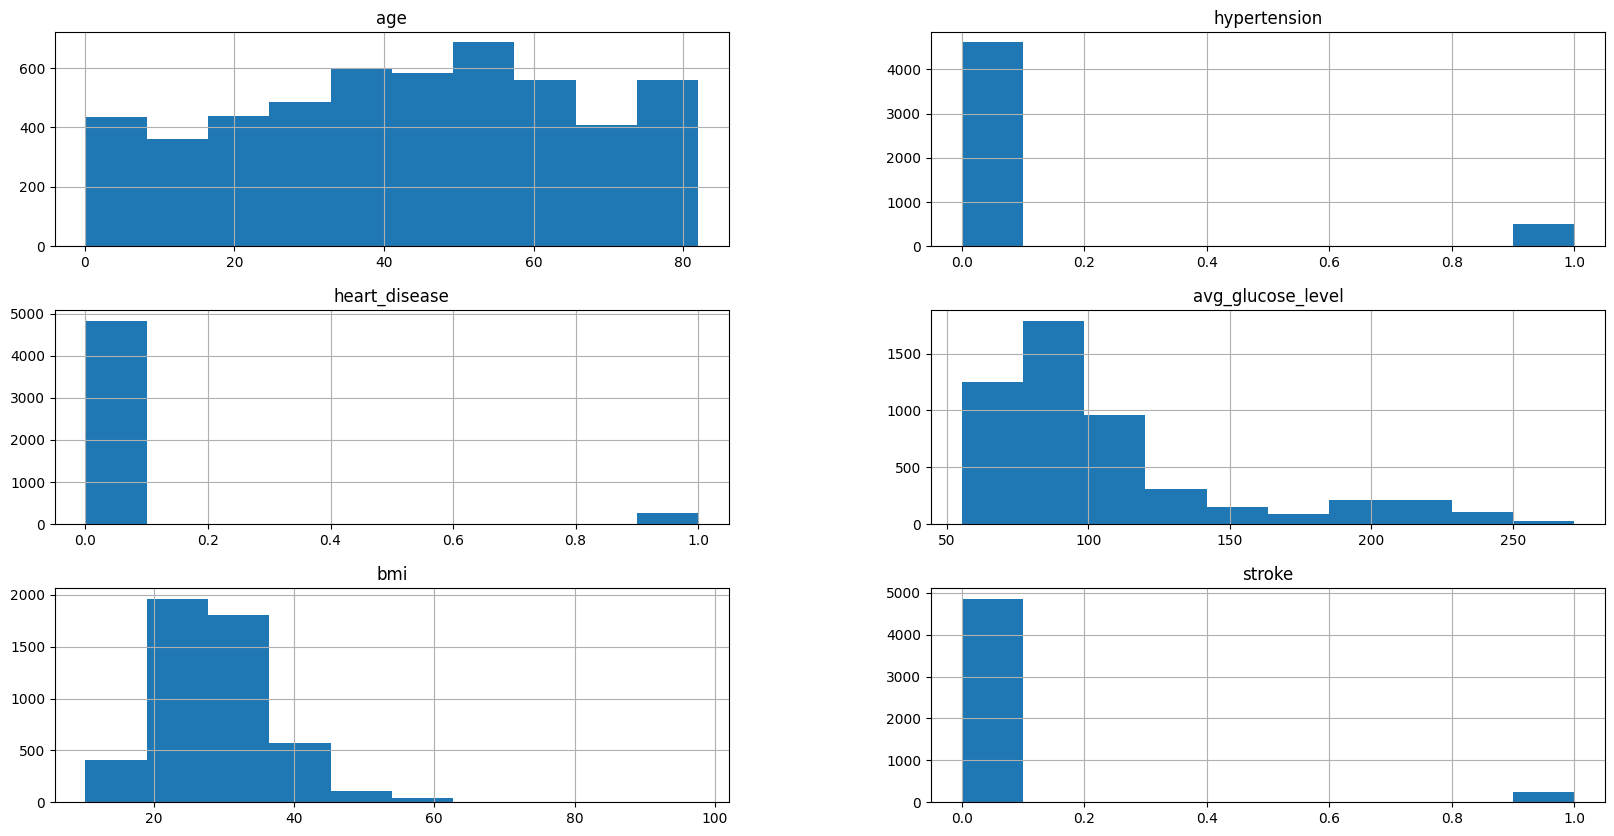

In [ ]:
data.hist(figsize=(20,10))

<ipython-input-11-35bb61c0e505>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

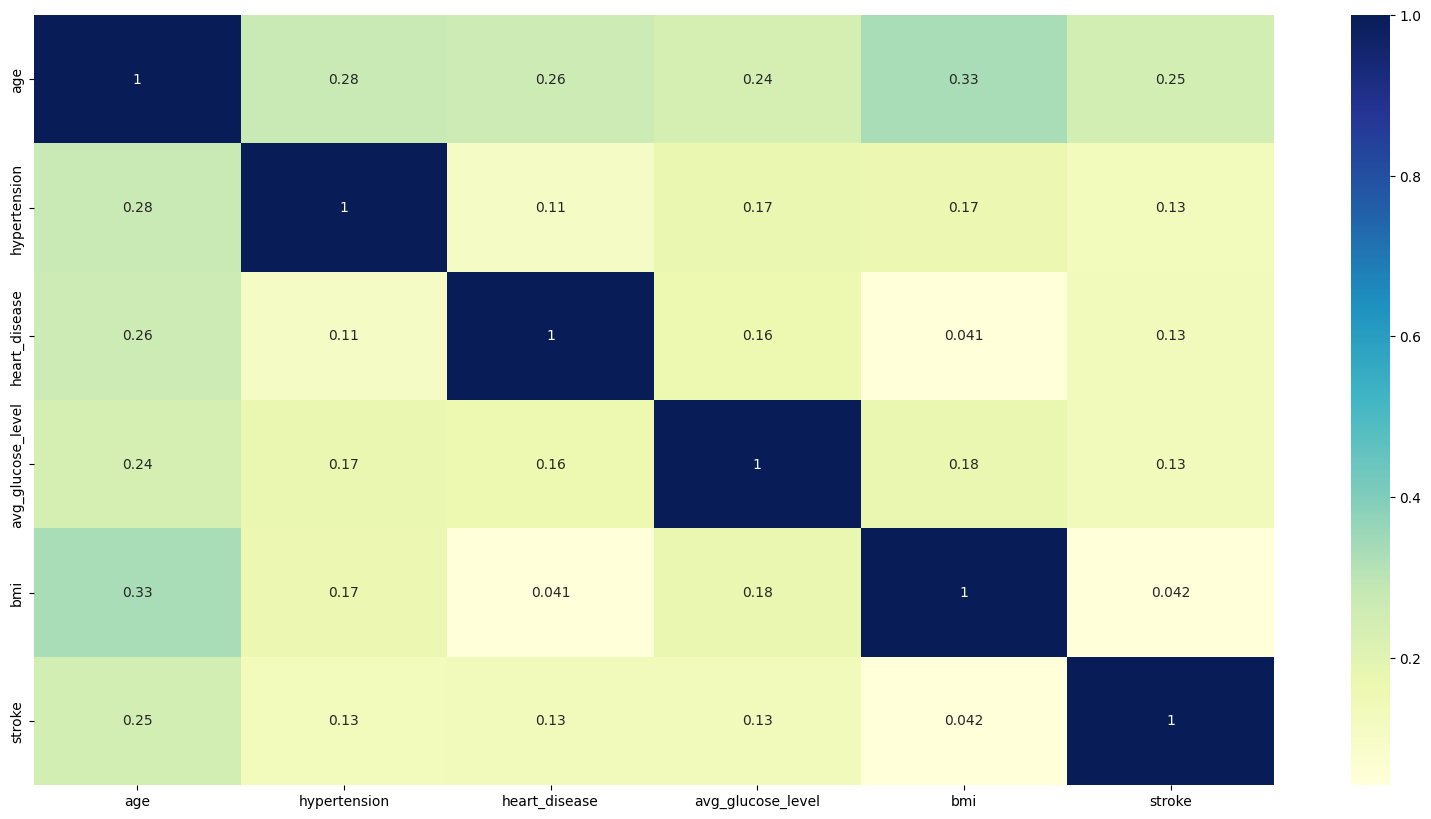

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

UNIVARIATE ANALYSIS

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. 

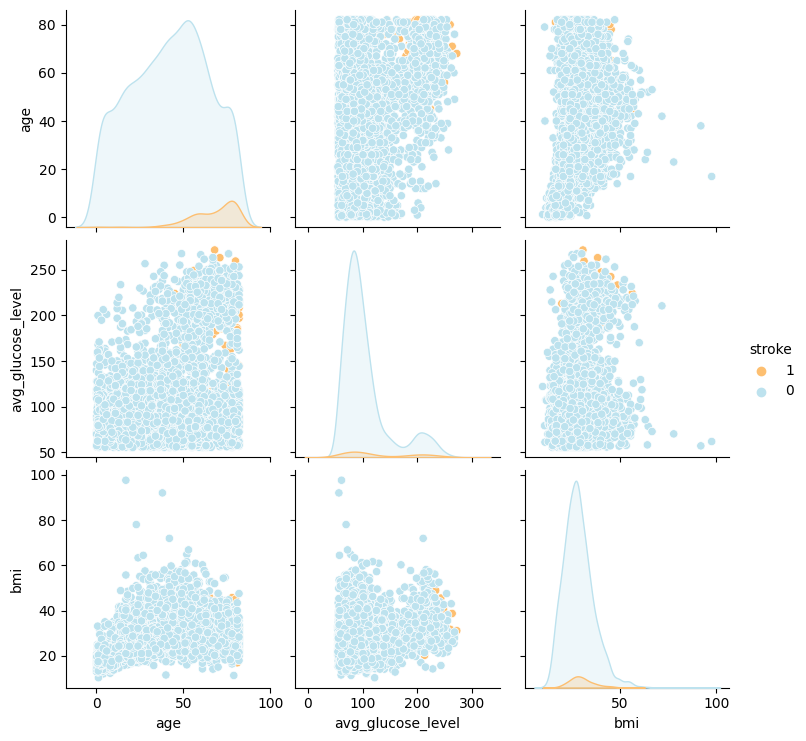

In [ ]:
#we will observe the scatterplots of numerical variables, as well as the respective distribution of each one, highlighting the stroke values ​​for each visualization
sns.pairplot(data.drop(['hypertension', 
                      'heart_disease'], axis=1), 
             hue='stroke',
             palette='RdYlBu',
             hue_order=[1,0]);

MULTIVARIATE ANALYSIS

Multivariate analysis involves evaluating multiple variables (more than two) to identify any possible association among them. It offers a more complete examination of data by looking at all possible independent variables and their relationships to one another

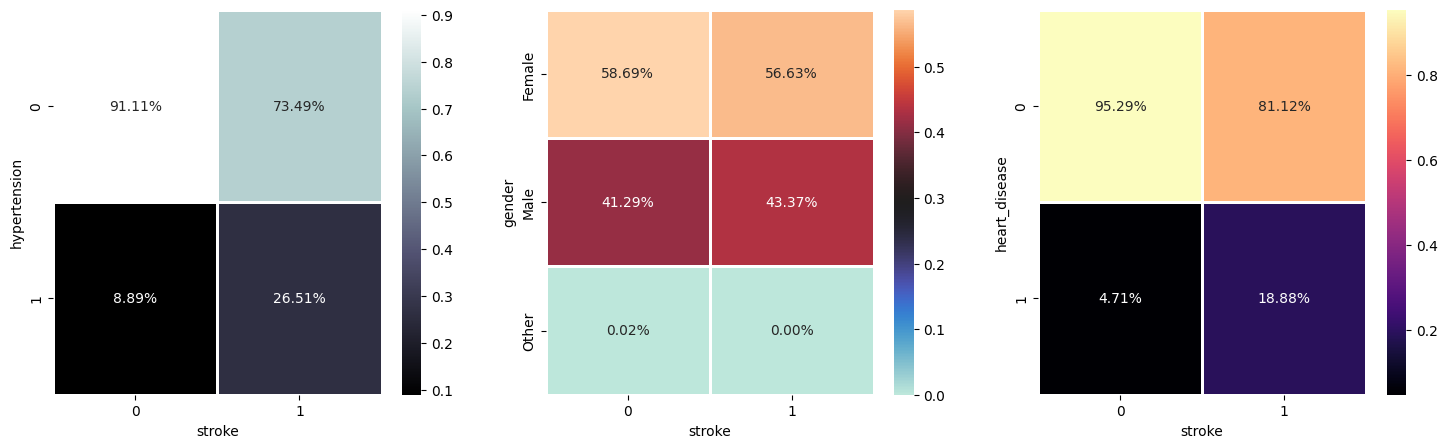

In [ ]:
#check the possibilities of getting stroke based on these variables: hypertension, gender, heart_disease 
#using heatmap to find the correleation between the above variables and stroke
fig, ax = plt.subplots(1, 3, figsize=(18,5))

var = ['hypertension', 'gender', 'heart_disease'] #variables to compare
cmaps = ['bone', 'icefire', 'magma'] #attributes of map

for var, i in zip(var, range(3)):
    ctab = pd.crosstab(data[var], 
                   data['stroke'], 
                   normalize='columns')

    sns.heatmap(ctab, 
                annot=True, 
                fmt='.2%', 
                ax=ax[i],
                cmap=cmaps[i], 
                linewidths=1);

We can conclude that individuals without hypertension are the majority of people who have had a stroke. Women account for the largest number of stroke cases. People who do *not* have heart problems are the majority of those who have a stroke.

## Data Preprocessing

### Handling missing values

There are various techniques to handle missing data:
1. Delete the record with missing values
    - this step is okay if you have a very huge dataset 
    - it is not suitable for small dataset
    - if the dataset is small, deleting records with missing values will impact the performance of the model in a bad way
2. Create a separate model to handle missing values
    - takes more time and computational efforts
    - consider the records with missing values as test dataset and the records without missing values as training dataset
    - eg. f1 has missing values, use f2, f3, f4 to feed to that separate training model and let f1 be the output feature
    - then use the f2, f3, f4 of the record with missing value to feed as input to the model, it will give output for f1(the missing value)
    - suitable for when you have smaller dataset, with lesser missing values
3. Using statistical methods like mean, median or mode
    - mean --> use the simple average to replace the missing values
    - median --> sort in ascending order then use the central element to replace the missing values
    - mode --> use the value with most frequency to replace the missing values

For this model, we have chosen to use the statistical method using mean for the missing values of bmi.

In [ ]:
def draw_missing_data_table(data) :
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total , percent] , axis=1 , keys=['Total','Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
bmi,201,0.039335
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [ ]:
# Inputting the missing values with the mean
data = data.fillna(np.mean(data['bmi']))

In [ ]:
data.info() # display the status of updated dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


We have successfully filled in the missing values of bmi

### Handling non-numerical values

In [ ]:
#using one hot encoding to convert all categorical data 
#integer encoded variable is removed and a new binary variable is added
categorical = ['gender', 'ever_married', 'work_type', 
               'Residence_type', 'smoking_status']

for i in categorical:
    data = pd.concat([data, pd.get_dummies(data[i], prefix=i)], axis=1)
    data.drop(i, axis=1, inplace=True)


In [ ]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


### Analysis with stroke

In [ ]:
# Classifying data into numerical and categorical variables
data_numerical = data[['age','avg_glucose_level','bmi']]

In [ ]:
pd.DataFrame(data['stroke'].value_counts())

,stroke
0,4861
1,249


We observe that the dataset in question is unbalanced, since we have 4,861 instances without stroke but 249 examples with stroke, so we can conclude that it will make much easier for a Machine Learning model to predict instances 0 than 1.

In [ ]:
#removing missing values
print(data.shape)

data.dropna(inplace=True)

print(data.shape)

(5110, 22)
(5110, 22)


Feature Selection

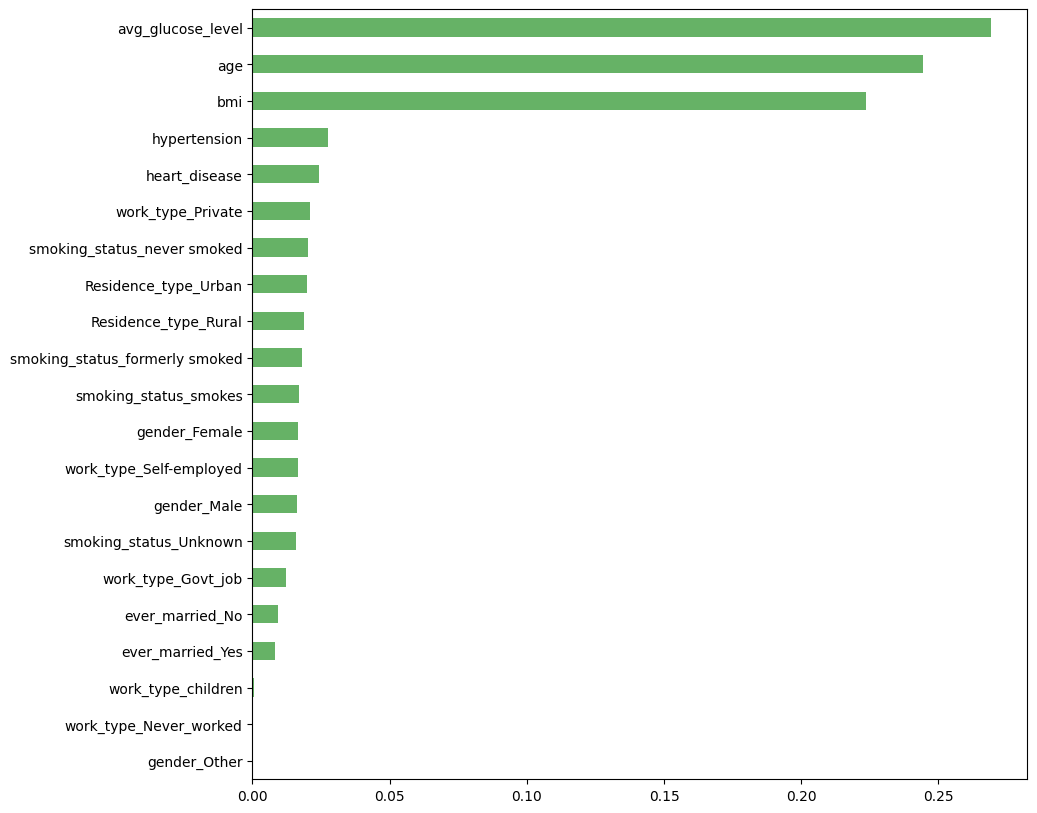

In [ ]:
#using random forest classifier to identify features 
from sklearn.ensemble import RandomForestClassifier

rffs = RandomForestClassifier()

rffs.fit(data.drop('stroke', axis=1), 
         data['stroke'])

rf_importances = rffs.feature_importances_
rf_importances = pd.Series(rf_importances, 
                           index=data.drop('stroke', axis=1) \
                                   .columns.values)

plt.figure(figsize=(10,10))
rf_importances.sort_values()\
              .plot(kind='barh', 
                    color='g', 
                    alpha=.6);

We can conclude that the variables avg_gulcose_level, age, and bmi affect the prediction of getting stroke the highest. 

In [ ]:
#dividing datasets to features and target
# Features
X = data.drop(['stroke'], axis=1).values

# Target
y = data['stroke'].values

In [ ]:
#check for null values
data.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

### Splitting datasets into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                   np.reshape(y,(-1,1)), 
                                   test_size=0.25,
                                   random_state=42,
                                   shuffle=True)

print(f'Length of original dataframe size: {len(X)}')
print(f'Length of training dataframe size (75%): {len(X_train)}')
print(f'Length of testing dataframe size (25%): {len(X_test)}')

Length of original dataframe size: 5110
Length of training dataframe size (75%): 3832
Length of testing dataframe size (25%): 1278


In [ ]:
#shape of training and testing data
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)
     

(3832, 21)
(3832, 1)
(1278, 21)
(1278, 1)


### Normalising data values

### Standardizing data values

## Machine Learning Model Training